In [9]:
import numpy as np
import pandas as pd
#data = pd.read_csv('C:/Users/varunn/Documents/Confluence attachments/MachinelearningHeadcount.csv')
data1 = pd.read_csv('C:/Users/varunn/Documents/Confluence attachments/Placeholder job analysis/Machinelearningv2.csv')


In [10]:
data1

,jobid,ClientID,Headcount,FinanceValue,weeks,Accelerator,Activation,Analytics (Non-Media),Analytics - Media,AR/VR/MR,...,SEM,SEO,Social,Social Listening,Sponsorship / Partnership,Strategy Development,Technical Development,Technology Consulting,Video Production,Web
0,40535,949,23,68213,12,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,40843,918,18,150250,34,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,41162,877,26,65145,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,42230,613,43,662892,50,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,42265,732,11,389954,17,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,42334,730,23,172854,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42356,967,29,226275,14,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
7,42360,834,61,1268070,38,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
8,42361,834,36,231066,23,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9,42362,803,33,262149,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
features_raw = data1.drop(['JobID'],axis = 1)
features = pd.get_dummies(features_raw,columns=['ClientID'])

In [176]:
from IPython.display import display
display(features.describe())

,FTE,FinanceValue
count,2737.000000,2.737000e+03
mean,10.658020,1.311280e+05
std,11.941406,2.512634e+05
min,0.000000,4.725000e+01
25%,2.000000,1.360800e+04
50%,7.000000,4.760100e+04
75%,15.000000,1.449100e+05
max,108.000000,3.399555e+06


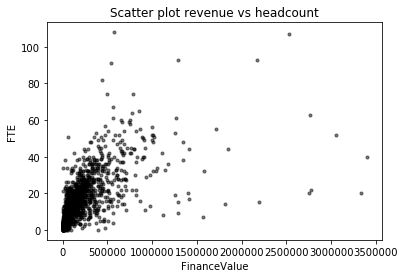

In [177]:
import matplotlib.pyplot as plt

# Create data

x = data1['FinanceValue']
y = data1['FTE']
colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot revenue vs headcount')
plt.xlabel('FinanceValue')
plt.ylabel('FTE')
plt.show()

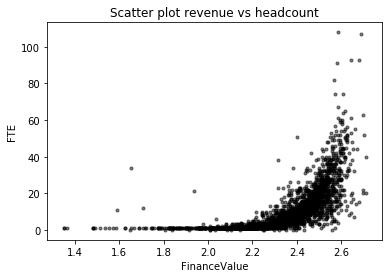

In [178]:
import matplotlib.pyplot as plt

# Create data

x = np.log(features['FinanceValue'])
y = features['FTE']
colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot revenue vs headcount')
plt.xlabel('FinanceValue')
plt.ylabel('FTE')
plt.show()


In [179]:
features_raw['FinanceValue'] = np.log(features_raw['FinanceValue'])


In [144]:
features = pd.get_dummies(features_raw,columns=['ClientID'])


In [180]:
display(features.describe())

,FTE,FinanceValue
count,2737.000000,2737.000000
mean,10.658020,10.596583
std,11.941406,1.765463
min,0.000000,3.855453
25%,2.000000,9.518413
50%,7.000000,10.770609
75%,15.000000,11.883868
max,108.000000,15.039155


In [181]:
from sklearn.cross_validation import train_test_split

#Drop Fresh
new_data=features.copy()
Y = new_data['FTE']
new_data.drop('FTE',axis=1,inplace=True)

# Split the 'features' and 'income' data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(new_data, Y, test_size = 0.25, random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 2052 samples.
Testing set has 685 samples.


In [182]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import time
from sklearn.ensemble import AdaBoostClassifier as ABC


#clf_A = ABC(random_state = 42).fit((X_train[:sample_size],y_train[:sample_size]))

# TODO: Fit the learner to the training data using slicing with 'sample_size'
start = time() # Get start time
clf_A = ABC(random_state = 42).fit(X_train,y_train)
end = time() # Get end time
    
# TODO: Calculate the training time
train_time = end-start
    
start = time() # Get start time
#predictions_test = learner.predict(X_test)
predictions_train = clf_A.predict(X_train)
end = time()
pred_time = end-start

acc_score = accuracy_score(predictions_train,y_train)

#fbe_sore = fbeta_score(y_train,predictions_train,beta=.5)

print train_time,pred_time,acc_score

    


1.64099979401 0.968000173569 0.0687134502924


In [183]:
start = time() # Get start time
#predictions_test = learner.predict(X_test)
predictions_test = clf_A.predict(X_test)
end = time()
pred_time_test = end-start

acc_score = accuracy_score(predictions_test,y_test)
print pred_time_test,acc_score

0.202999830246 0.0613138686131


In [184]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import time
from sklearn import svm 


#clf_A = ABC(random_state = 42).fit((X_train[:sample_size],y_train[:sample_size]))

# TODO: Fit the learner to the training data using slicing with 'sample_size'
start = time() # Get start time
clf_B = svm.SVC(random_state = 42).fit(X_train,y_train)
end = time() # Get end time
    
# TODO: Calculate the training time
train_time = end-start
    
start = time() # Get start time
#predictions_test = learner.predict(X_test)
predictions_train = clf_B.predict(X_train)
end = time()
pred_time = end-start

acc_score = accuracy_score(predictions_train,y_train)

#fbe_sore = fbeta_score(y_train,predictions_train,beta=.5)

print train_time,pred_time,acc_score


0.983000040054 1.1859998703 0.288499025341


In [185]:
start = time() # Get start time
#predictions_test = learner.predict(X_test)
predictions_test = clf_B.predict(X_test)
end = time()
pred_time_test = end-start

acc_score = accuracy_score(predictions_test,y_test)
print pred_time_test,acc_score

0.530999898911 0.290510948905


In [186]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import time
from sklearn import tree


#clf_A = ABC(random_state = 42).fit((X_train[:sample_size],y_train[:sample_size]))

# TODO: Fit the learner to the training data using slicing with 'sample_size'
start = time() # Get start time
clf_C = tree.DecisionTreeClassifier(random_state = 42).fit(X_train,y_train)
end = time() # Get end time
    
# TODO: Calculate the training time
train_time = end-start
    
start = time() # Get start time
#predictions_test = learner.predict(X_test)
predictions_train = clf_C.predict(X_train)
end = time()
pred_time = end-start

acc_score = accuracy_score(predictions_train,y_train)

#fbe_sore = fbeta_score(y_train,predictions_train,beta=.5)

print train_time,pred_time,acc_score

0.0469999313354 0.0 0.980506822612


In [187]:
start = time() # Get start time
#predictions_test = learner.predict(X_test)
predictions_test = clf_C.predict(X_test)
end = time()
pred_time_test = end-start

acc_score = accuracy_score(predictions_test,y_test)
print pred_time_test,acc_score


0.0160000324249 0.204379562044


In [160]:
data2 = pd.read_csv('C:/Users/varunn/Documents/Confluence attachments/Machinelearningv2.csv')

In [161]:
data2

,jobid,ClientID,Headcount,FinanceValue,weeks,Accelerator,Activation,Analytics (Non-Media),Analytics - Media,AR/VR/MR,...,SEM,SEO,Social,Social Listening,Sponsorship / Partnership,Strategy Development,Technical Development,Technology Consulting,Video Production,Web
0,40535,949,23,68213,12,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,40843,918,18,150250,34,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,41162,877,26,65145,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,42230,613,43,662892,50,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,42265,732,11,389954,17,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,42334,730,23,172854,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42356,967,29,226275,14,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
7,42360,834,61,1268070,38,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
8,42361,834,36,231066,23,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9,42362,803,33,262149,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
features_raw1 = data2.drop(['jobid'],axis = 1)
features_raw1['FinanceValue'] = np.log(features_raw1['FinanceValue'])
features1 = pd.get_dummies(features_raw1,columns=['ClientID'])


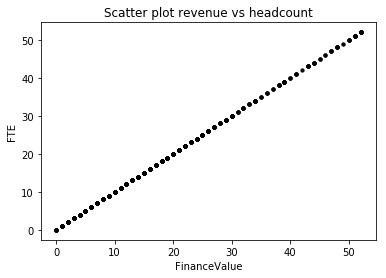

In [200]:
import matplotlib.pyplot as plt

# Create data

x = (features1['weeks'])
y = features1['weeks']
colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot revenue vs headcount')
plt.xlabel('FinanceValue')
plt.ylabel('FTE')
plt.show()


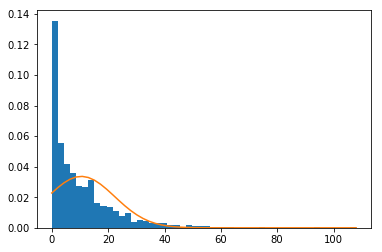

In [206]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
array = features1['Headcount']

n, bins, patches = plt.hist(array, 50, normed=1)
mu = np.mean(array)
sigma = np.std(array)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [164]:
display(features1.describe())

,Headcount,FinanceValue,weeks,Accelerator,Activation,Analytics (Non-Media),Analytics - Media,AR/VR/MR,Art Production,Audio Production,...,ClientID_1117,ClientID_1120,ClientID_1121,ClientID_1122,ClientID_1123,ClientID_1129,ClientID_1172,ClientID_1174,ClientID_1175,ClientID_1180
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,...,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.00000
mean,10.473111,10.586909,13.812933,0.003959,0.015836,0.043220,0.013857,0.004289,0.017486,0.007918,...,0.000660,0.000330,0.000330,0.000330,0.000330,0.011547,0.003629,0.004949,0.000330,0.00132
std,11.859652,1.776175,11.818302,0.062807,0.124863,0.203386,0.116916,0.065361,0.131095,0.088646,...,0.025683,0.018164,0.018164,0.018164,0.018164,0.106854,0.060143,0.070185,0.018164,0.03631
min,0.000000,3.850148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,9.515133,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,6.000000,10.753638,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,15.000000,11.879170,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,108.000000,15.039155,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [211]:
#LDA reducing dimension
new_data1=features1.copy()
Y1 = new_data1['Headcount']
new_data1.drop('Headcount',axis=1,inplace=True)




In [305]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
LDA = LDA(n_components=5).fit(new_data1,Y1)
reduced_data=LDA.transform(new_data1)
reduced_data=pd.DataFrame(reduced_data,columns= ['D1','D2','D3','D4','D5'])

#,'D6','D7','D8','D9'
#,'D10','D11','D12','D13','D14','D15','D16','D17'
#,'D18','D19','D20','D21','D22','D23','D24','D25
#,'D26','D27','D28','D29','D30','D31','D32','D33','D34','D35',
#'D36','D37','D38','D39','D40','D41','D42','D43','D44','D45'

reduced_data1=reduced_data.join(Y1,how='inner')

In [292]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, Y1, test_size = 0.25, random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 2273 samples.
Testing set has 758 samples.


TypeError: plot_surface() takes at least 4 arguments (3 given)

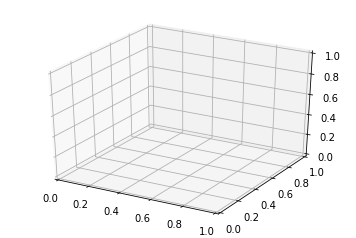

In [304]:
import matplotlib.pyplot as plt
# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

# To get reproducable values, provide a seed value
np.random.seed(1)

# Fit the model
model = ols("z ~ x + y", data).fit()